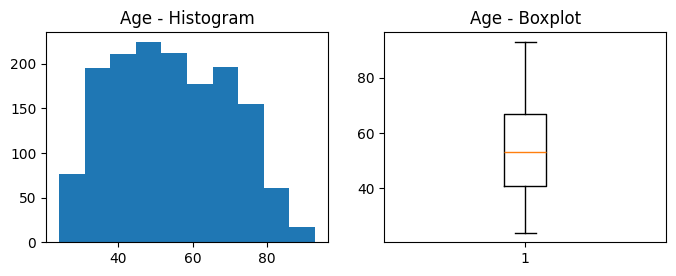

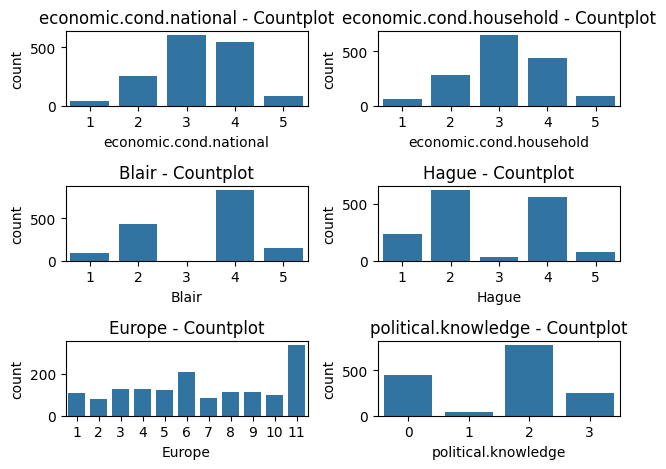

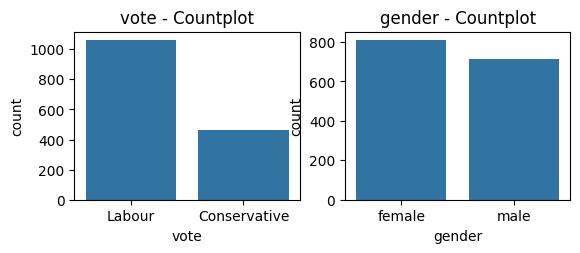

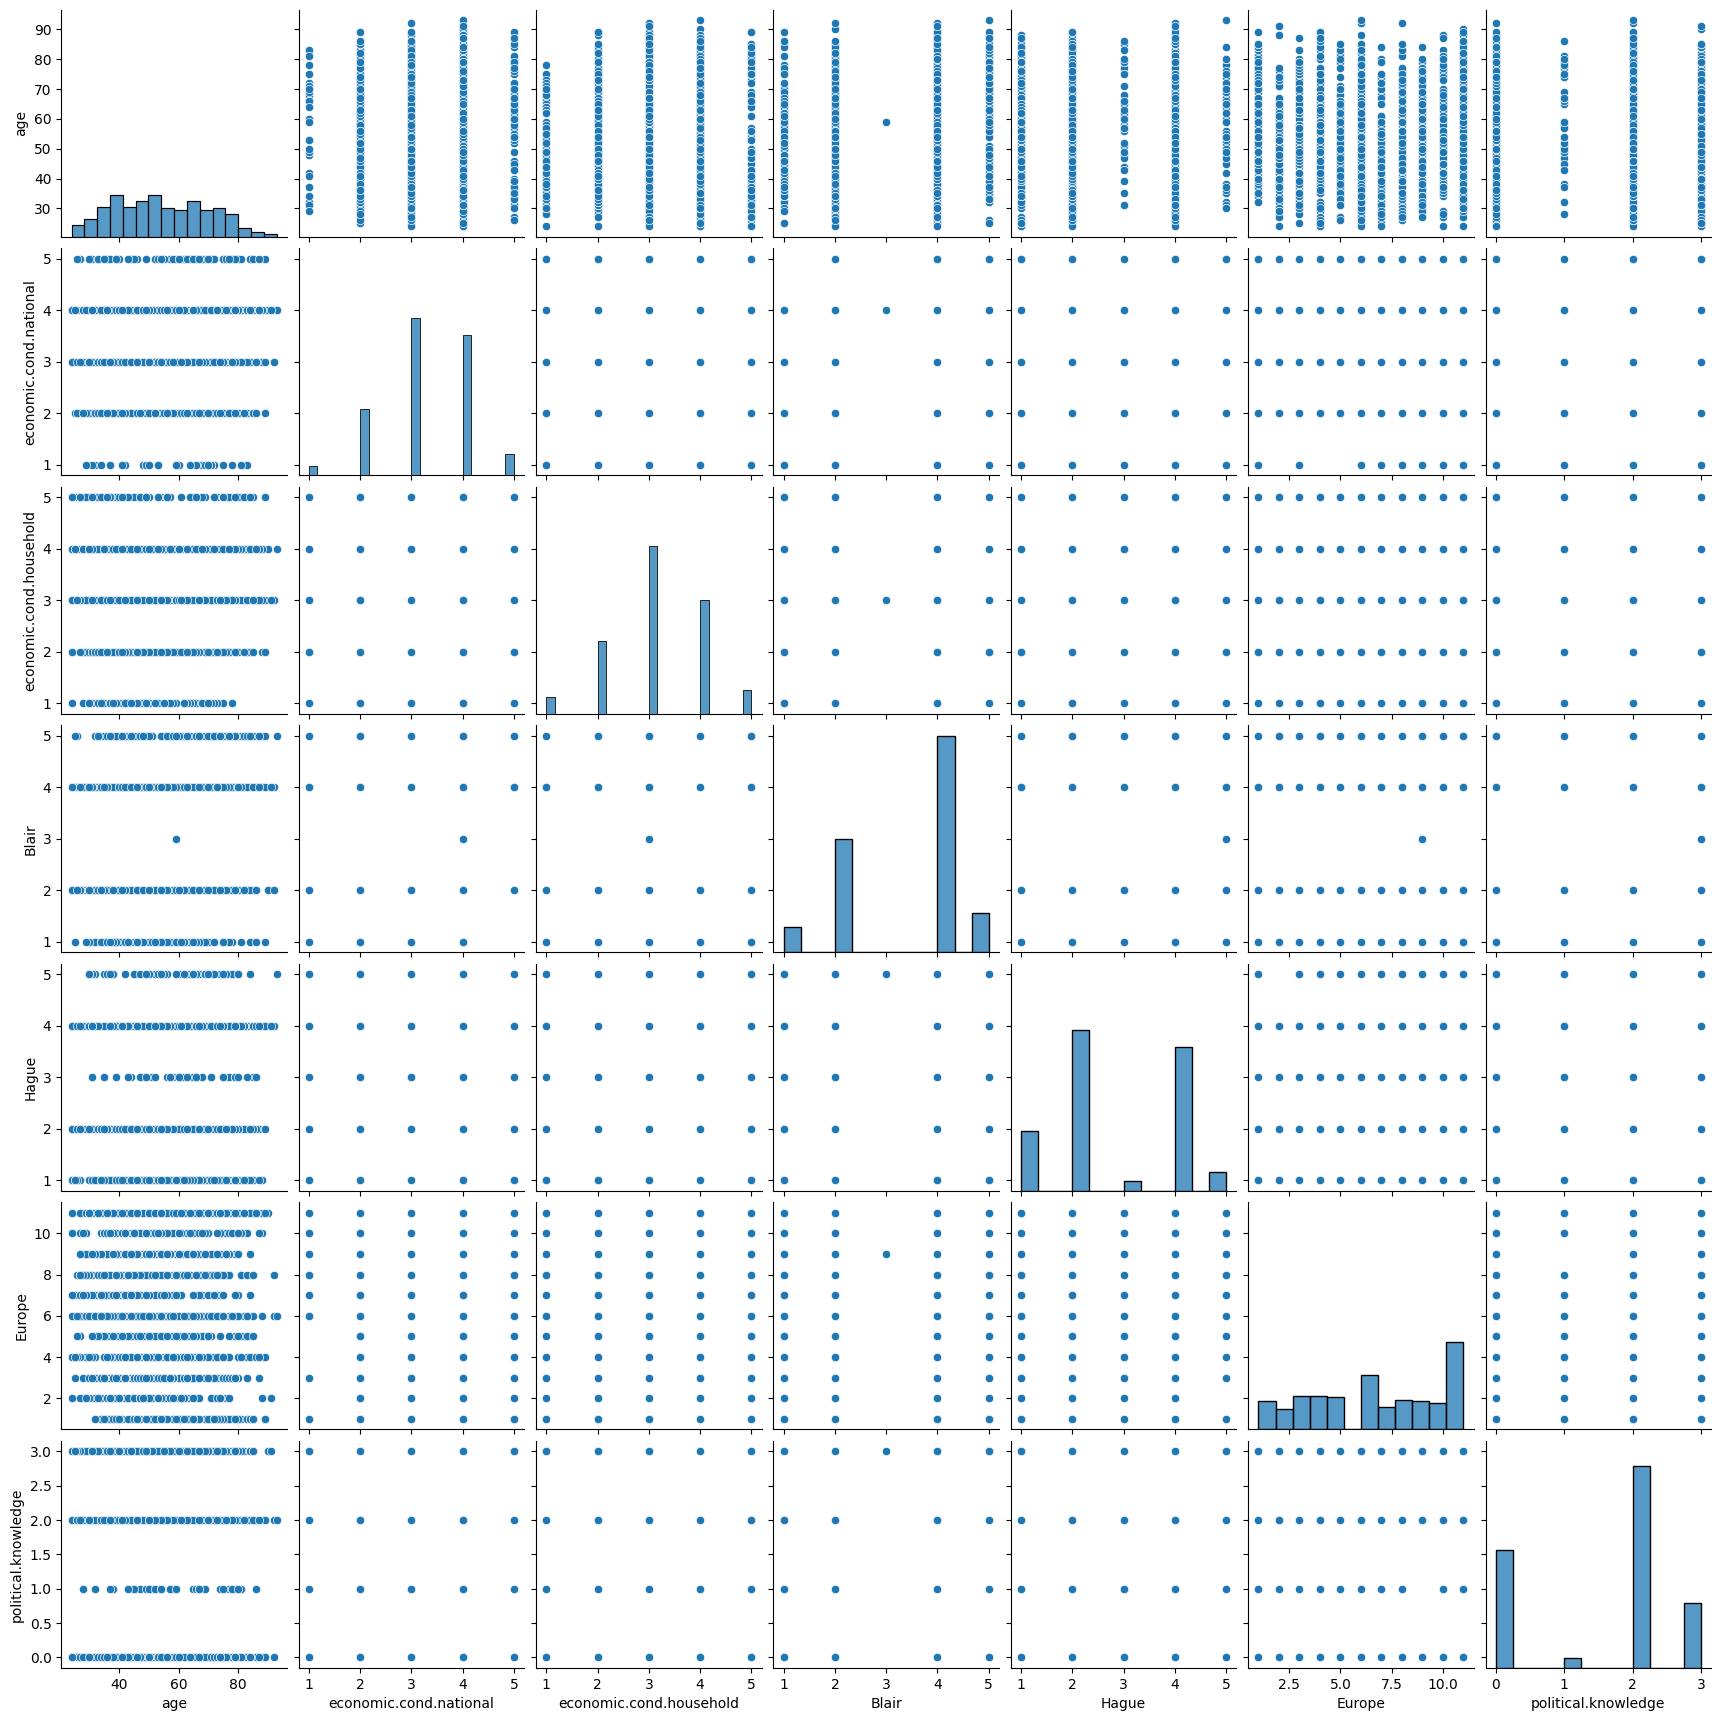

Accuracy of Train data -  83.97375820056232
Confusion Matrix -  [[229 103]
 [ 68 667]]
ROC AUC Score of Train data -  88.94168510777804


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


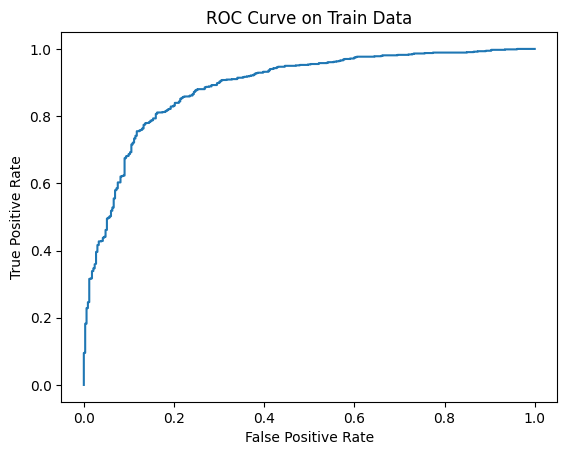

Accuracy of Test data -  82.31441048034934
Confusion Matrix -  [[ 85  45]
 [ 36 292]]
ROC AUC Score of Test data -  88.24108818011257


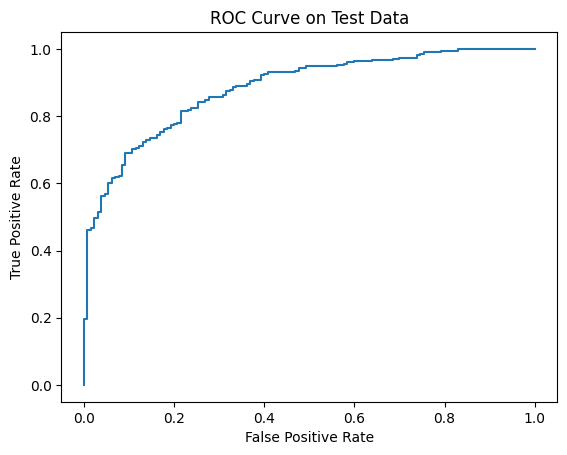

Accuracy of Train data -  86.41049671977507
Confusion Matrix -  [[248  84]
 [ 61 674]]
ROC AUC Score of Train data -  91.2671092533399


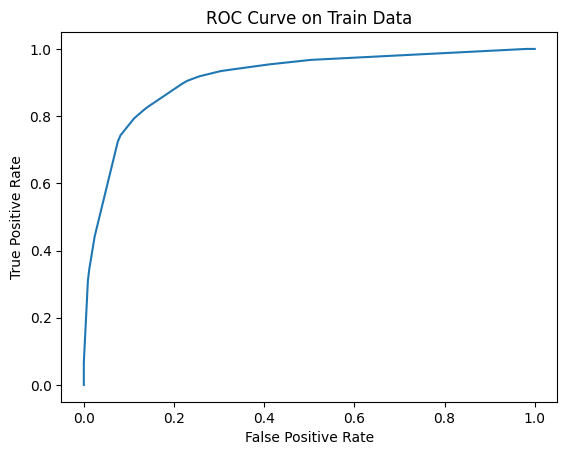

Accuracy of Test data -  81.00436681222706
Confusion Matrix -  [[ 92  38]
 [ 49 279]]
ROC AUC Score of Test data -  81.17495309568481


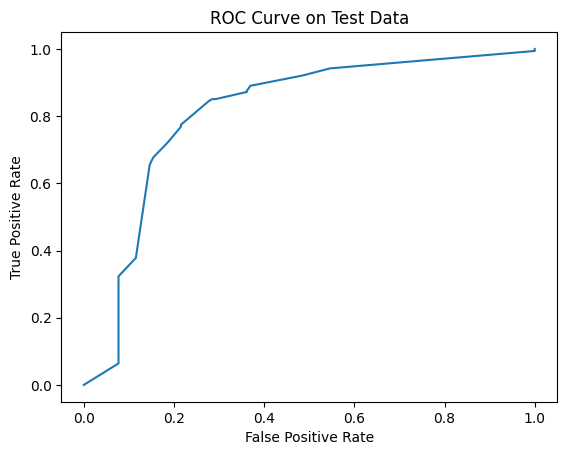

Accuracy of Train data -  99.90627928772258
Confusion Matrix -  [[331   1]
 [  0 735]]
ROC AUC Score of Train data -  99.9997950987624


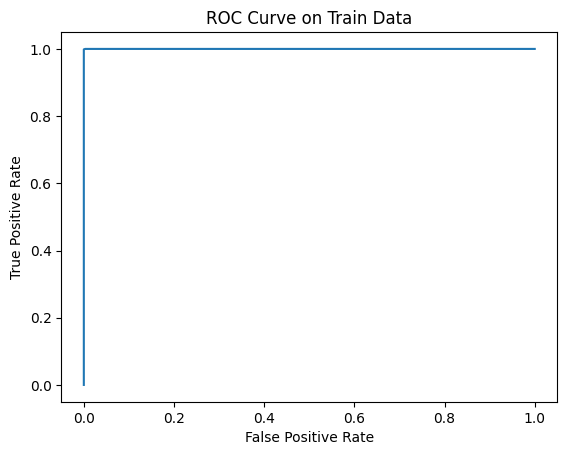

Accuracy of Test data -  82.09606986899564
Confusion Matrix -  [[ 90  40]
 [ 42 286]]
ROC AUC Score of Test data -  88.73475609756096


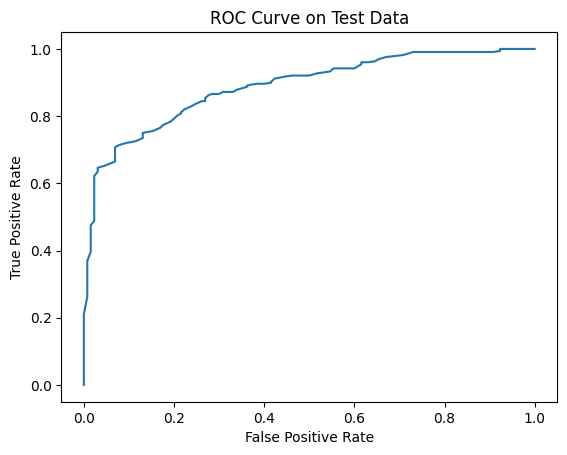

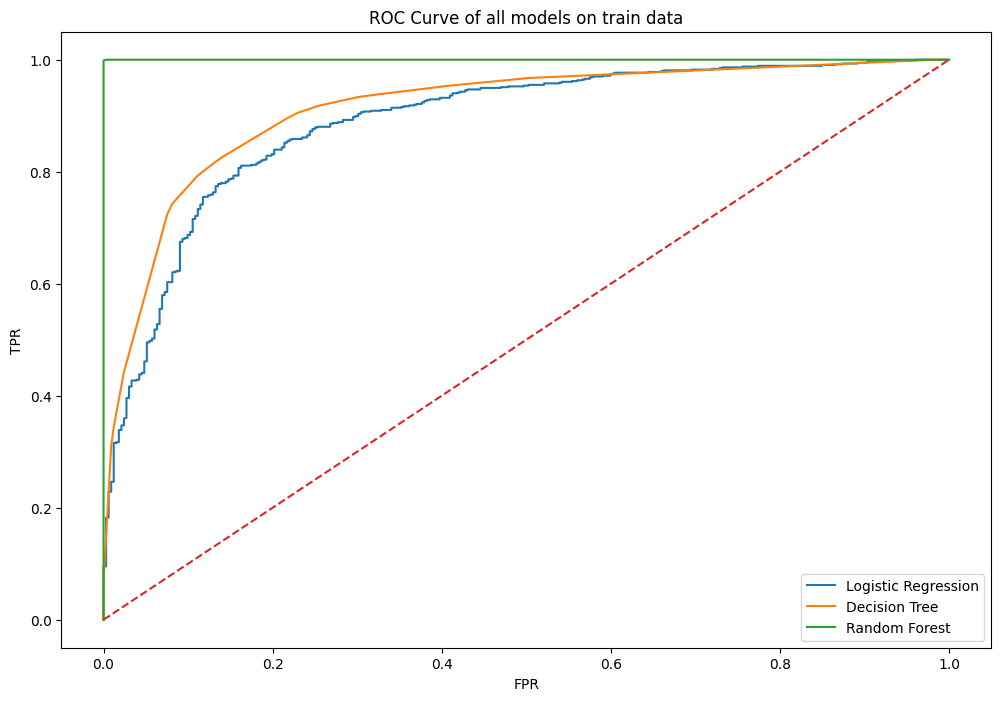

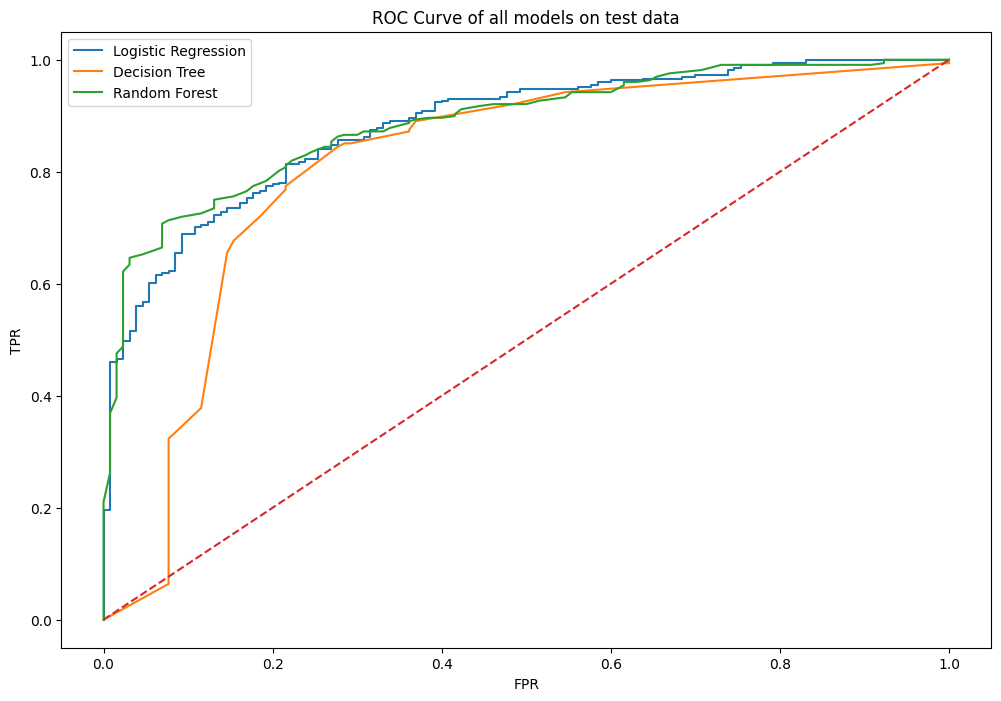

In [ ]:
#For numerical operations
import numpy as np


import pandas as pd

# seaborn and matplotlib  packages are  used for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#machine learning metrics such as precision, recall ,accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score


# Reading the data from excel
election_df=pd.read_excel(r'/content/Election_Data.xlsx','Election_Dataset_Two Classes')

#Summary statistics
election_df.describe().T

#checking null values
election_df.isnull().sum()

# keep relevant and drop irrevalant columns
election_df.drop('Unnamed: 0', axis=1, inplace=True)

# Grouping Categorical and Numeric variables for analysis
c_features = []
n_features = []
for i in election_df.columns:
  if election_df[i].dtype == 'object':
    c_features.append(i)
  else:
    n_features.append(i)

r_features = []
for i in n_features:
  if i != 'age':
    r_features.append(i)
r_features

plt.figure(figsize=(8,6))

# Histogram - Age
plt.subplot(2,2,1)
plt.hist(election_df['age'], bins=10)
plt.title('Age - Histogram')

# Box plot - Age
plt.subplot(2,2,2)
plt.boxplot(election_df['age'])
plt.title('Age - Boxplot')
plt.show()

# Count plot - economic.cond.household
plt.subplot(3,2,1)
sns.countplot(x=election_df['economic.cond.national'])
plt.title('economic.cond.national - Countplot')

# Count plot - economic.cond.household
plt.subplot(3,2,2)
sns.countplot(x=election_df['economic.cond.household'])
plt.title('economic.cond.household - Countplot')

# Count plot - Blair
plt.subplot(3,2,3)
sns.countplot(x=election_df['Blair'])
plt.title('Blair - Countplot')

# Count plot - Hague
plt.subplot(3,2,4)
sns.countplot(x=election_df['Hague'])
plt.title('Hague - Countplot')

# Count plot - Europe
plt.subplot(3,2,5)
sns.countplot(x=election_df['Europe'])
plt.title('Europe - Countplot')

# Count plot - political.knowledge
plt.subplot(3,2,6)
sns.countplot(x=election_df['political.knowledge'])
plt.title('political.knowledge - Countplot')
plt.tight_layout()
plt.show()

# Count plot - vote
plt.subplot(2,2,1)
sns.countplot(x=election_df['vote'])
plt.title('vote - Countplot')

# Count plot - gender
plt.subplot(2,2,2)
sns.countplot(x=election_df['gender'])
plt.title('gender - Countplot')
plt.show()

# Pair plot
sns.pairplot(election_df)
plt.show()

# encoding of Gender and Vote
election_df['gender']=election_df['gender'].map({'male':1,'female':0})
election_df['vote']=election_df['vote'].map({'Labour':1,'Conservative':0})

X = election_df.drop('vote', axis = 1)
Y = election_df['vote']

#Splitting train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)


def display_pref_metrics(Y_train,Y_train_pred,Y_test,Y_test_pred,estimator):
  print('Accuracy of Train data - ',accuracy_score(Y_train,Y_train_pred)*100)
  print('Confusion Matrix - ', confusion_matrix(Y_train,Y_train_pred))
  print('ROC AUC Score of Train data - ',roc_auc_score(Y_train,estimator.predict_proba(X_train)[:,1])*100)
  FPR_train,TPR_train,threshold_train=roc_curve(Y_train,estimator.predict_proba(X_train)[:,1])
  plt.plot(FPR_train,TPR_train)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve on Train Data')
  plt.show()


  print('Accuracy of Test data - ',accuracy_score(Y_test,Y_test_pred)*100)
  print('Confusion Matrix - ', confusion_matrix(Y_test,Y_test_pred))
  print('ROC AUC Score of Test data - ',roc_auc_score(Y_test,estimator.predict_proba(X_test)[:,1])*100)
  FPR_test,TPR_test,threshold_test=roc_curve(Y_test,estimator.predict_proba(X_test)[:,1])
  plt.plot(FPR_test,TPR_test)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve on Test Data')
  plt.show()


# 1.Linear Regression
LR=LogisticRegression()
logistic_model=LR.fit(X_train,Y_train)

Y_test_pred_LR=logistic_model.predict(X_test)
Y_train_pred_LR=logistic_model.predict(X_train)
display_pref_metrics(Y_train,Y_train_pred_LR,Y_test,Y_test_pred_LR,LR)

# 2.Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=5, criterion='gini')
decision_tree.fit(X_train, Y_train)

Y_train_pred_DT = decision_tree.predict(X_train)
Y_test_pred_DT = decision_tree.predict(X_test)
display_pref_metrics(Y_train,Y_train_pred_DT,Y_test,Y_test_pred_DT,decision_tree)

# 3.Random Forest
rand_forest = RandomForestClassifier(random_state=1)
rand_forest.fit(X_train, Y_train)

Y_train_pred_RF=rand_forest.predict(X_train)
Y_test_pred_RF=rand_forest.predict(X_test)
display_pref_metrics(Y_train,Y_train_pred_RF,Y_test,Y_test_pred_RF,rand_forest)

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# ROC curve for all models on Train Data
plt.figure(figsize = [12, 8])
plt.title('ROC Curve of all models on train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(roc_curve(Y_train,LR.predict_proba(X_train)[:,1])[0], roc_curve(Y_train,LR.predict_proba(X_train)[:,1])[1])
plt.plot(roc_curve(Y_train,decision_tree.predict_proba(X_train)[:,1])[0], roc_curve(Y_train,decision_tree.predict_proba(X_train)[:,1])[1])
plt.plot(roc_curve(Y_train,rand_forest.predict_proba(X_train)[:,1])[0], roc_curve(Y_train,rand_forest.predict_proba(X_train)[:,1])[1])
plt.plot([0,1], [0,1], linestyle = '--')
plt.legend(model_names)
plt.show()

# ROC curve for all models on Test Data
plt.figure(figsize = [12, 8])
plt.title('ROC Curve of all models on test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(roc_curve(Y_test,LR.predict_proba(X_test)[:,1])[0], roc_curve(Y_test,LR.predict_proba(X_test)[:,1])[1])
plt.plot(roc_curve(Y_test,decision_tree.predict_proba(X_test)[:,1])[0], roc_curve(Y_test,decision_tree.predict_proba(X_test)[:,1])[1])
plt.plot(roc_curve(Y_test,rand_forest.predict_proba(X_test)[:,1])[0], roc_curve(Y_test,rand_forest.predict_proba(X_test)[:,1])[1])
plt.plot([0,1], [0,1], linestyle = '--')
plt.legend(model_names)
plt.show()



In [ ]:
Y_sum

,Labour,Conservative
Actual,1063,462
Predicted,1062,463
